In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import mglearn

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [0]:
from sklearn.metrics import r2_score

In [0]:
data=pd.read_table('Twitter.data',sep=',',header=None)

In [0]:
X_1=data[[0,7,14,21,28,35,42,49,56,63,70]] 
X_2=data[[1,8,15,22,29,36,43,50,57,64,71]] 
X_3=data[[2,9,16,23,30,37,44,51,58,65,72]] 
X_4=data[[3,10,17,24,31,38,45,52,59,66,73]] 
X_5=data[[4,11,18,25,32,39,46,53,60,67,74]]
X_6=data[[5,12,19,26,33,40,47,54,61,68,75]] 
X_7=data[[6,13,20,27,34,41,48,55,62,69,76]]

X=data.loc[:,0:76]
y=data[77]

In [0]:
X.shape

(583250, 77)

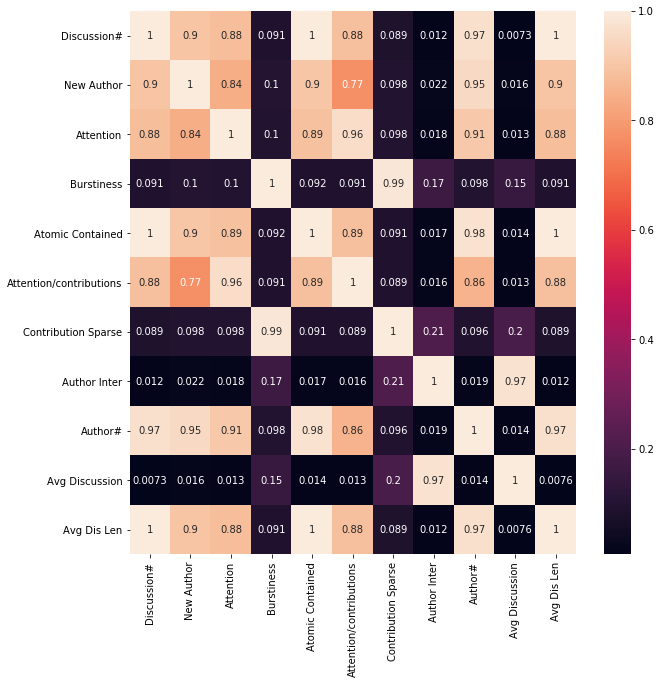

In [0]:
from pandas.plotting import scatter_matrix
X_1.columns=['Discussion#','New Author','Attention','Burstiness','Atomic Contained','Attention/contributions','Contribution Sparse','Author Inter','Author#','Avg Discussion','Avg Dis Len']
X_7.columns=['Discussion#','New Author','Attention','Burstiness','Atomic Contained','Attention/contributions','Contribution Sparse','Author Inter','Author#','Avg Discussion','Avg Dis Len']
time1_corr=X_1.corr()
time7_corr=X_7.corr()

import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
ax1 = sns.heatmap(time1_corr, annot=True)

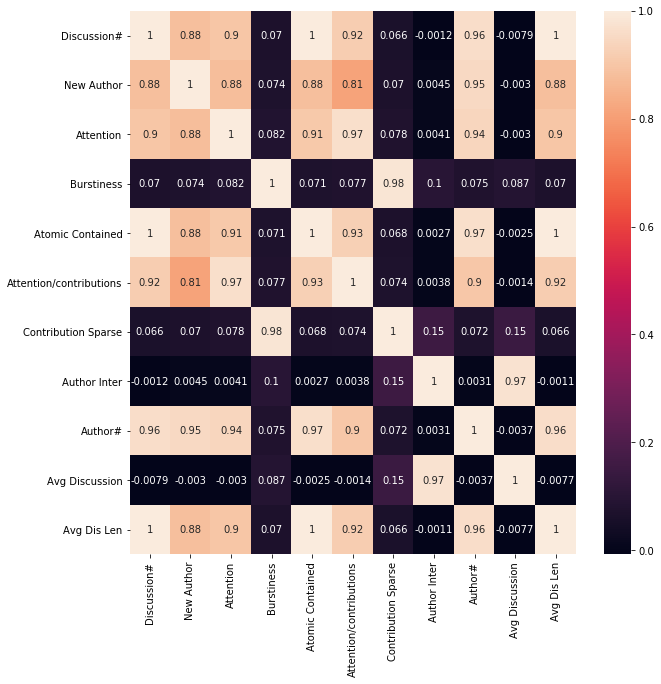

In [0]:
fig, ax = plt.subplots(figsize=(10,10))
ax2 = sns.heatmap(time7_corr, annot=True)

#### This is a dataset with high correlation problems. Dimension Reduction can be performed later to make the analysis more efficient.
#### The two tables above showing varible's correlation with each other during time period 1 and 7, and it seems that Burstiness and contribution sparse have very high correlation with each other from begining. Author interacion and average discussion has very high correltaion from begining. the rest variables have very high relationship with each other.
#### With three groups of correlations, we pick one variable from each group, and see if they can seperate the data nicely.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c099e6e48>,
      dtype=object)

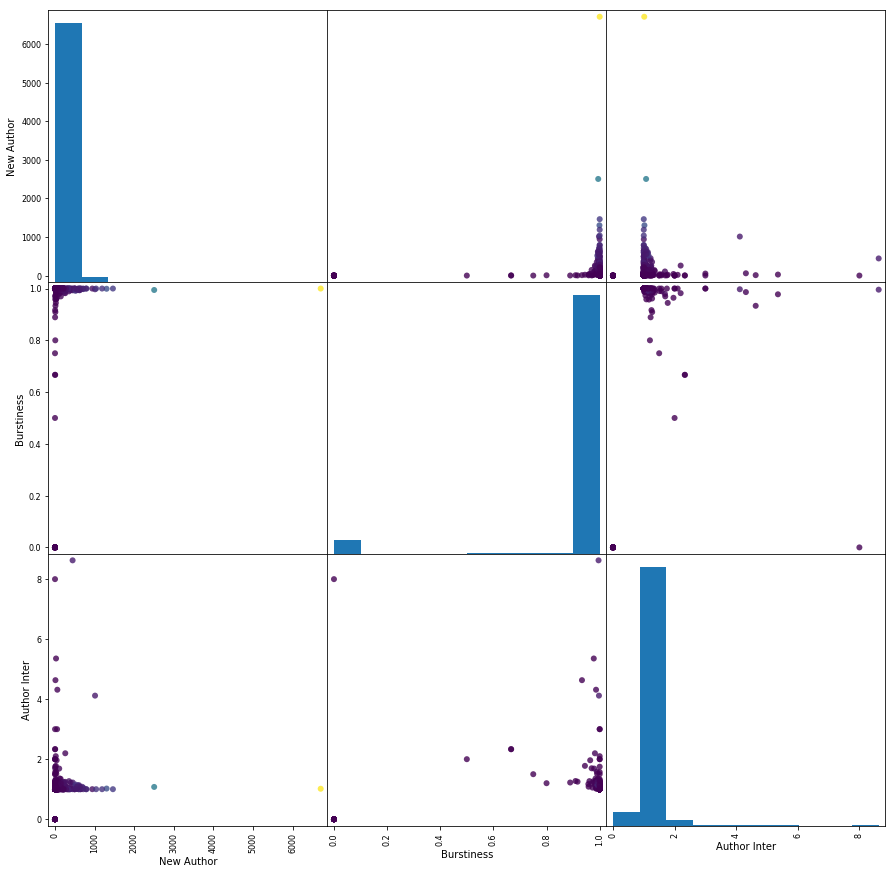

In [0]:
sample = np.random.randint(low=0,high=583200,size=500)
X_7t = X_7.iloc[sample,[1,3,7]]
yt= y.iloc[sample]

scatter_matrix(X_7t, figsize = (15,15), c = yt, alpha = 0.8, marker = 'O')

However, the result shows the three variabes piles together, and cannot tell from each other.

In [0]:
X.shape

(583250, 77)

So there are 583250 observations in this dataset.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_orgF, X_test_orgF, y_trainF, y_testF = train_test_split(X, y, random_state = 0, test_size = 0.2)
scaler = StandardScaler()
X_trainF = scaler.fit_transform(X_train_orgF)
X_testF = scaler.transform(X_test_orgF)

In [0]:
# 10% testing sets, default shuffle = True.

a_, Xt, b_, yt = train_test_split(X, y, random_state = 0, test_size = 0.1)

X_train_org, X_test_org, y_train, y_test = train_test_split(Xt, yt, random_state = 0, test_size = 0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

### KNN Regressor

In [1]:
from sklearn.neighbors import KNeighborsRegressor

In [0]:
best_score = 0
train_score_knn = []
test_score_knn = []

for n_neighbors in range(1,10):
    knn_r = KNeighborsRegressor(n_neighbors=n_neighbors, n_jobs=-1)
    knn_r.fit(X_train, y_train)
    train_score_knn.append(knn_r.score(X_train, y_train))
    test_score_knn.append(knn_r.score(X_test, y_test))
    k_score = knn_r.score(X_test, y_test)
    if k_score > best_score:
        best_score = k_score
        best_knn_parameters = {'n_neighbors': n_neighbors}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_knn_parameters))

Best score: 0.94
Best parameters: {'n_neighbors': 7}


Text(0,0.5,'R^2')

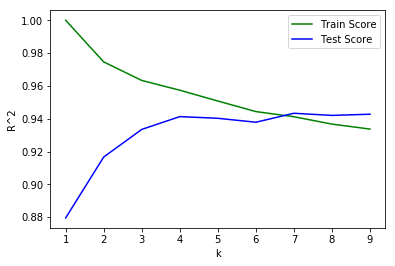

In [0]:
x_axis = range(1,10)
plt.plot(x_axis, train_score_knn, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_knn, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('R^2')

In [0]:
knnr=KNeighborsRegressor(**best_knn_parameters)
knn_train = cross_val_score(knnr, X_train, y_train, cv=5,n_jobs=-1)
knn_test = cross_val_score(knnr, X_test, y_test, cv=5,n_jobs=-1)
knn_train=knn_train.mean()
knn_test=knn_test.mean()

### Linear Regression

Text(0.5,0,'RM')

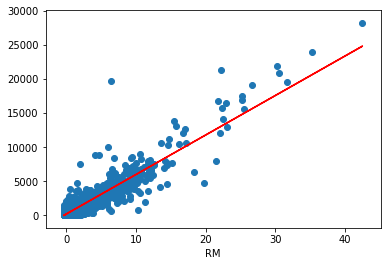

In [0]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

lreg.fit(X_train, y_train)

%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,5].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

In [0]:
lreg_train = cross_val_score(lreg, X_train, y_train, cv=5, n_jobs=-1)
lreg_test = cross_val_score(lreg, X_test, y_test, cv=5, n_jobs=-1)
lreg_train=lreg_train.mean()
lreg_test=lreg_test.mean()

### RIDGE

In [0]:
from  sklearn.linear_model import Ridge

In [0]:
best_score = 0
x_range = [0.01, 0.1, 1, 10, 100]
train_score_ridge = []
test_score_ridge = []

for alpha in x_range:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    train_score_ridge.append(ridge.score(X_train, y_train))
    test_score_ridge.append(ridge.score(X_test, y_test))
    ridge_score = ridge.score(X_test, y_test)
    if ridge_score > best_score:
        best_score = ridge_score
        best_ridge_parameters = {'alpha': alpha}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_ridge_parameters))

Best score: 0.95
Best parameters: {'alpha': 0.1}


Text(0.5,0,'$\\alpha$')

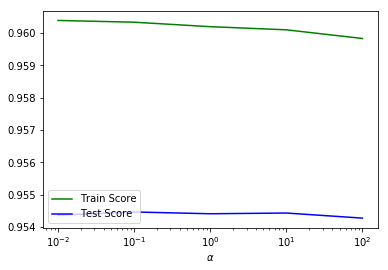

In [0]:
plt.plot(x_range, train_score_ridge, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_ridge, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [0]:
ridge=Ridge(**best_ridge_parameters)
ridge_train = cross_val_score(ridge, X_train, y_train, cv=5, n_jobs=-1)
ridge_test = cross_val_score(ridge, X_test, y_test, cv=5, n_jobs=-1)
ridge_train=ridge_train.mean()
ridge_test=ridge_test.mean()

### LASSO

In [0]:
from sklearn.linear_model import Lasso

best_score = 0
x_range = [0.01, 0.1, 1, 10, 100]
train_score_lasso = []
test_score_lasso = []

for alpha in x_range:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    train_score_lasso.append(lasso.score(X_train, y_train))
    test_score_lasso.append(lasso.score(X_test, y_test))
    lasso_score = lasso.score(X_test, y_test)
    if lasso_score > best_score:
        best_score = lasso_score
        best_lasso_parameters = {'alpha': alpha}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_lasso_parameters))

/Users/Xiaoyuanyuan2/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Xiaoyuanyuan2/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Xiaoyuanyuan2/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Best score: 0.95
Best parameters: {'alpha': 1}


Text(0.5,0,'$\\alpha$')

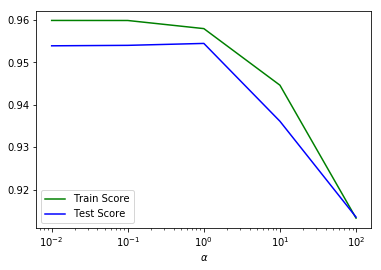

In [0]:
plt.plot(x_range, train_score_lasso, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_lasso, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [0]:
lasso=Lasso(**best_lasso_parameters)
lasso_train = cross_val_score(lasso, X_train, y_train, cv=5,n_jobs=-1)
lasso_test = cross_val_score(lasso, X_test, y_test, cv=5,n_jobs=-1)
lasso_train=lasso_train.mean()
lasso_test=lasso_test.mean()

/Users/Xiaoyuanyuan2/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Xiaoyuanyuan2/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Xiaoyuanyuan2/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Xiaoyuanyuan2/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: Converge

### Linear SVR

In [0]:
from sklearn.svm import LinearSVR

x_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_score_lsvr = []
test_score_lsvr = []

best_score = 0

for C in x_range:
    lsvr = LinearSVR(C=C)
    lsvr.fit(X_train, y_train)
    train_score_lsvr.append(lsvr.score(X_train, y_train))
    test_score_lsvr.append(lsvr.score(X_test, y_test))
    lsvr_score = lsvr.score(X_test, y_test)
    if lsvr_score > best_score:
        best_score = lsvr_score
        best_lsvr_parameters = {'C': C}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_lsvr_parameters))

Best score: 0.96
Best parameters: {'C': 100}


Text(0.5,0,'$C$')

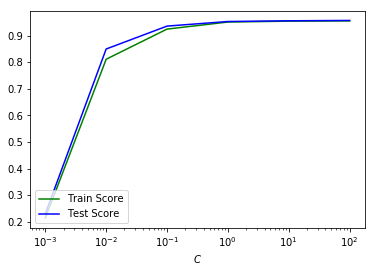

In [0]:
plt.plot(x_range, train_score_lsvr, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_lsvr, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$C$')

In [0]:
lsvr=LinearSVR(**best_lsvr_parameters)
lsvr_train = cross_val_score(lsvr, X_train, y_train, cv=5,n_jobs=-1)
lsvr_test = cross_val_score(lsvr, X_test, y_test, cv=5,n_jobs=-1)
lsvr_train=lsvr_train.mean()
lsvr_test=lsvr_test.mean()

### Polynomial Regression

#### (When we added the polynomial features to 3, computer started to die. After a few times trying, we reduce it to 2 so there could be result running out.)

In [0]:
from  sklearn.preprocessing  import PolynomialFeatures
x_range = [1,2]
best_score = 0
train_score_poly= []
test_score_poly= []

for n in x_range:
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_poly.append(lreg.score(X_train_poly, y_train))
    test_score_poly.append(lreg.score(X_test_poly, y_test))
    score = lreg.score(X_test_poly, y_test)
    if score > best_score:
        best_score = score
        best_poly_parameters = {'degree': n}
        
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_poly_parameters))

Best score: 0.95
Best parameters: {'degree': 1}


Text(0.5,0,'$C$')

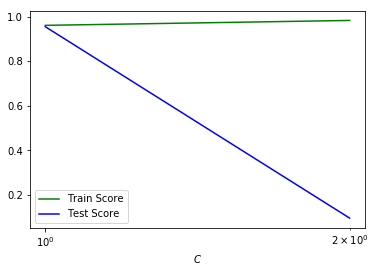

In [0]:
plt.plot(x_range, train_score_poly, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_poly, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$C$')

In [0]:
poly = PolynomialFeatures(**best_poly_parameters)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_train = cross_val_score(lreg, X_train_poly, y_train, cv=5,n_jobs=-1)
poly_test = cross_val_score(lreg, X_test_poly, y_test, cv=5,n_jobs=-1)
poly_train=poly_train.mean()
poly_test=poly_test.mean()

### Kernel SVR

#### The code took forever to run, so we randomly took a small sample of training and testing set for kernel svr models.

In [0]:
from sklearn.svm import SVR

In [0]:
a_, X_kernel, b_, y_kernel = train_test_split(Xt, yt, random_state = 1, test_size = 0.1)

X_train_org_kernel, X_test_org_kernel, y_train_kernel, y_test_kernel = train_test_split(X_kernel, y_kernel, random_state = 0, test_size = 0.2)
scaler = StandardScaler()
X_train_kernel = scaler.fit_transform(X_train_org_kernel)
X_test_kernel = scaler.transform(X_test_org_kernel)


#### Linear kernel

In [0]:
x_range = [0.1, 1, 10, 100]
train_score_ksvr1 = []
test_score_ksvr1 = []

best_score = 0

for C in x_range:
    ksvr1 = SVR(kernel='linear',C=C)
    ksvr1.fit(X_train_kernel, y_train_kernel)
    train_score_ksvr1.append(ksvr1.score(X_train_kernel, y_train_kernel))
    test_score_ksvr1.append(ksvr1.score(X_test_kernel, y_test_kernel))
    ksvr1_score = ksvr1.score(X_test_kernel, y_test_kernel)
    if ksvr1_score > best_score:
        best_score = ksvr1_score
        best_ksvr_ln_parameters = {'C': C}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_ksvr_ln_parameters))

Best score: 0.96
Best parameters: {'C': 10}


Text(0.5,0,'$C$')

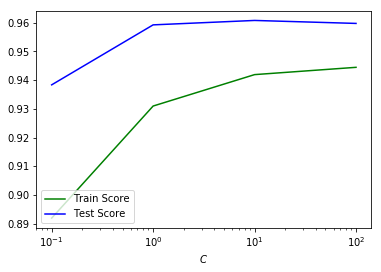

In [0]:
plt.plot(x_range, train_score_ksvr1, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_ksvr1, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$C$')

In [0]:
ksvr1=SVR(kernel='linear')
ksvr_ln_train = cross_val_score(SVR(kernel='linear',**best_ksvr_ln_parameters), X_train_kernel, y_train_kernel, cv=5,n_jobs=-1)
ksvr_ln_test = cross_val_score(SVR(kernel='linear',**best_ksvr_ln_parameters), X_test_kernel, y_test_kernel, cv=5,n_jobs=-1)
ksvr_ln_train=ksvr_ln_train.mean()
ksvr_ln_test=ksvr_ln_test.mean()

#### Poly kernel
As our computers cannot handle polyfeature n=3, we only use 1, and 2 here.

In [0]:
x_range = [0.1, 1, 10, 100]
x2_range = [1,2]
best_score = 0
train_score_ksvr2= []
test_score_ksvr2= []

for C in x_range:
    for degree in x2_range:
        ksvr2 = SVR(kernel='poly',C=C, degree=degree)
        ksvr2.fit(X_train_kernel, y_train_kernel)
        train_score_ksvr2.append(ksvr2.score(X_train_kernel, y_train_kernel))
        test_score_ksvr2.append(ksvr2.score(X_test_kernel, y_test_kernel))
        score =  ksvr2.score(X_test_kernel, y_test_kernel)
        if score > best_score:
            best_score = score
            best_ksvr_poly_parameters = {'C': C, 'degree': degree}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_ksvr_poly_parameters))

Best score: 0.96
Best parameters: {'C': 100, 'degree': 1}


In [0]:
ksvr2=SVR(kernel='poly')
ksvr_poly_train = cross_val_score(SVR(kernel='poly',**best_ksvr_poly_parameters), X_train_kernel, y_train_kernel, cv=5,n_jobs=-1)
ksvr_poly_test = cross_val_score(SVR(kernel='poly',**best_ksvr_poly_parameters), X_test_kernel, y_test_kernel, cv=5,n_jobs=-1)
ksvr_poly_train=ksvr_poly_train.mean()
ksvr_poly_test=ksvr_poly_test.mean()

#### RBF kernel

In [0]:
x_range = [0.1, 1, 10, 100]
best_score = 0
train_score_ksvr3= []
test_score_ksvr3= []

for gamma in x_range:
    for C in x_range:
        ksvr3 = SVR(gamma=gamma, C=C)
        ksvr3.fit(X_train_kernel, y_train_kernel)
        train_score_ksvr3.append(ksvr3.score(X_train_kernel, y_train_kernel))
        test_score_ksvr3.append(ksvr3.score(X_test_kernel, y_test_kernel))
        score = ksvr3.score(X_test_kernel, y_test_kernel)
        if score > best_score:
            best_score = score
            best_ksvr_rbf_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_ksvr_rbf_parameters))

Best score: 0.14
Best parameters: {'C': 100, 'gamma': 0.1}


In [0]:
ksvr3=SVR(kernel='rbf')
ksvr_rbf_train = cross_val_score(SVR(kernel='rbf',**best_ksvr_rbf_parameters), X_train_kernel, y_train_kernel, cv=5,n_jobs=-1)
ksvr_rbf_test = cross_val_score(SVR(kernel='rbf',**best_ksvr_rbf_parameters), X_test_kernel, y_test_kernel, cv=5,n_jobs=-1)
ksvr_rbf_train=ksvr_rbf_train.mean()
ksvr_rbf_test=ksvr_rbf_test.mean()

### generate report on all models

In [0]:
report_table_r = [['knnr', 
                   best_knn_parameters,
                   knn_train,
                   knn_test],
                  ['linear regression',
                   '',
                   lreg_train,
                   lreg_train],
                  ['Ridge',
                   best_ridge_parameters,
                   ridge_train,
                   ridge_test],
                  ['Lasso',
                   best_lasso_parameters,
                   lasso_train,
                   lasso_test],
                  ['linear SVR',
                   best_lsvr_parameters,
                   lsvr_train,
                   lsvr_test],
                  ['rbf Kernel SVR',
                   best_ksvr_rbf_parameters,
                   ksvr_rbf_train,
                   ksvr_rbf_test],
                  ['poly Kernel SVR',
                   best_ksvr_poly_parameters,
                   ksvr_poly_train,
                   ksvr_poly_test],
                  ['linear Kernel SVR',
                   best_ksvr_ln_parameters,
                   ksvr_ln_train,
                   ksvr_ln_test],
                   ['Polynomial Regression',
                    best_poly_parameters,
                    poly_train,
                    poly_test]]

In [0]:
report_r = pd.DataFrame(report_table_r,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy'])
report_r.index = report_r['Model name']

In [0]:
report_r['accuracy_gap']=report_r['Test accuracy']-report_r['Train accuracy']
report_r

,Model name,Model parameter,Train accuracy,Test accuracy,accuracy_gap
Model name,,,,,
knnr,knnr,{'n_neighbors': 7},0.909576,0.894535,-0.015041
linear regression,linear regression,,0.955067,0.955067,0.000000
Ridge,Ridge,{'alpha': 0.1},0.955032,0.949742,-0.005291
Lasso,Lasso,{'alpha': 1},0.952809,0.949405,-0.003404
linear SVR,linear SVR,{'C': 100},0.951526,0.950892,-0.000634
rbf Kernel SVR,rbf Kernel SVR,"{'C': 100, 'gamma': 0.1}",0.206259,0.109021,-0.097238
poly Kernel SVR,poly Kernel SVR,"{'C': 100, 'degree': 1}",0.926399,0.934039,0.007641
linear Kernel SVR,linear Kernel SVR,{'C': 10},0.936459,0.941651,0.005192
Polynomial Regression,Polynomial Regression,{'degree': 1},0.955067,0.949519,-0.005548


From the summary above, Linear regression has best training score and testing score, the kernel SVR using different dataset with others, so their accuracy changes as the dataset changes. To better evaluate all models at same level, we need more time (more than 7 hours) or better machine to run the kernel svr. 
To run the whole dataset with linear regression:

In [0]:
lreg = LinearRegression()
lreg.fit(X_trainF, y_trainF)
print(lreg.score(X_trainF, y_trainF))
print(lreg.score(X_testF, y_testF))

0.9327419369182749
0.9479748733882256
